Missing values in dataset before processing:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Missing values in dataset after processing:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


C:\Users\BOK\AppData\Local\Temp\ipykernel_31780\1961447379.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # 평균값으로 대체
C:\Users\BOK\AppData\Local\Temp\ipykernel_31780\1961447379.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F


Logistic Regression Results:
Confusion Matrix (Numeric Values):
[[72, 8, 1, 1, 0], [18, 34, 1, 0, 0], [1, 18, 3, 0, 0], [3, 15, 3, 0, 0], [0, 6, 0, 0, 0]]
Accuracy: 0.5924
Precision: 0.3121
Recall (TPR): 0.8811
F1 Score: 0.3051
Error Rate: 0.4076
AUC: 0.7338
Specificity (TNR): 0.7429
Fall Out (FPR): 0.2571

Naive Bayes Results:
Confusion Matrix (Numeric Values):
[[66, 12, 0, 3, 1], [9, 26, 7, 10, 1], [1, 7, 3, 7, 4], [3, 10, 5, 2, 1], [0, 0, 3, 3, 0]]
Accuracy: 0.5272
Precision: 0.3110
Recall (TPR): 0.8510
F1 Score: 0.3077
Error Rate: 0.4728
AUC: 0.7846
Specificity (TNR): 0.7377
Fall Out (FPR): 0.2623

k-Nearest Neighbors Results:
Confusion Matrix (Numeric Values):
[[74, 7, 1, 0, 0], [16, 27, 4, 6, 0], [1, 12, 2, 7, 0], [5, 13, 3, 0, 0], [0, 2, 3, 1, 0]]
Accuracy: 0.5598
Precision: 0.2735
Recall (TPR): 0.8679
F1 Score: 0.2839
Error Rate: 0.4402
AUC: 0.6659
Specificity (TNR): 0.7334
Fall Out (FPR): 0.2666

Support Vector Classifier Results:
Confusion Matrix (Numeric Values):
[[71, 9, 0

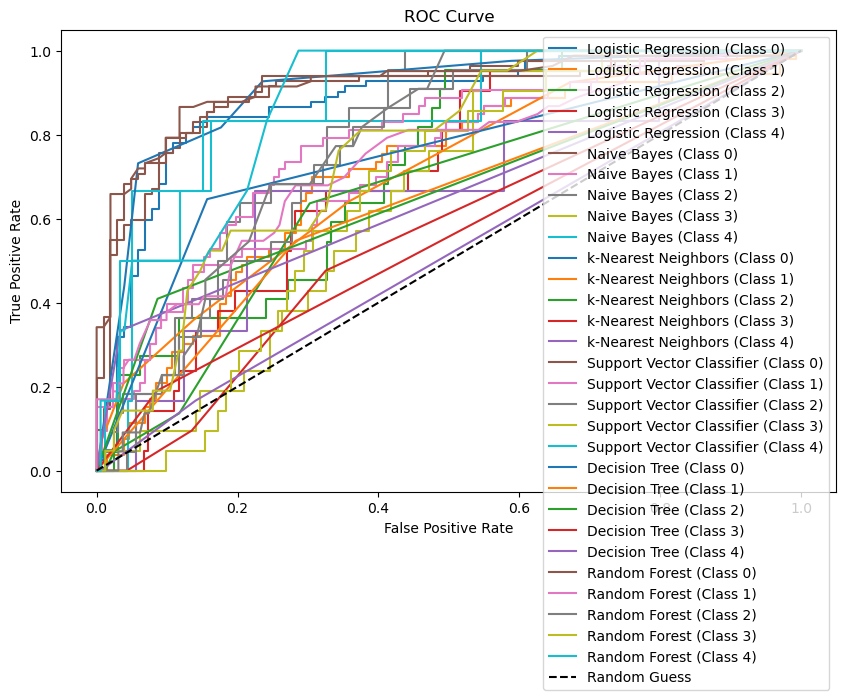

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

# 1. 데이터셋 불러오기
data_url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-14/heart_disease_uci.csv"
df = pd.read_csv(data_url)

# 2. 결측값 확인 및 처리
print("Missing values in dataset before processing:\n", df.isnull().sum())  # 결측값 확인

# 결측값 처리
for col in df.columns:
    if df[col].dtype == 'object':  # 범주형 데이터
        df[col].fillna(df[col].mode()[0], inplace=True)  # 최빈값으로 대체
    else:  # 수치형 데이터
        df[col].fillna(df[col].mean(), inplace=True)  # 평균값으로 대체

print("Missing values in dataset after processing:\n", df.isnull().sum())  # 결측값 확인

# 3. 컬럼 이름 정리
if 'num' in df.columns:
    df.rename(columns={"num": "target"}, inplace=True)  # 'num' 열을 'target'으로 변경
else:
    raise ValueError("The dataset does not contain a 'num' column.")

# 4. 타겟 변수 확인
assert 'target' in df.columns, "The dataset does not contain a 'target' column."
df['target'] = df['target'].astype(int)  # 보장: 타겟 변수는 정수

# 독립 변수와 종속 변수 분리
X = df.drop(["target", "id", "dataset"], axis=1)  # 불필요한 열 제거
y = df["target"]

# Train-Test Split 후 결측값 확인
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 최종적으로 결측값 확인
assert not X_train.isnull().values.any(), "X_train contains NaN values!"
assert not X_test.isnull().values.any(), "X_test contains NaN values!"

# 범주형 변수 처리
label_encoders = {}
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal']  # 범주형 컬럼
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # 범주형 변수를 수치형으로 변환
    X_test[col] = le.transform(X_test[col])  # 동일한 변환 적용
    label_encoders[col] = le

# 데이터 스케일링 (k-NN, SVM에서 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 분류 알고리즘 초기화
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 결과 저장용
results = {}

# 모델 학습 및 평가
for name, model in models.items():
    if name in ["k-Nearest Neighbors", "Support Vector Classifier"]:
        model.fit(X_train_scaled, y_train)  # 스케일링된 데이터 사용
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)
    
    # 평가
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')  # 다중 클래스 처리
    rec = recall_score(y_test, y_pred, average='macro')      # 다중 클래스 처리
    f1 = f1_score(y_test, y_pred, average='macro')           # 다중 클래스 처리
    error_rate = 1 - acc
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')   # 다중 클래스 AUC

    # 오차행렬에서 TP, FP, TN, FN 계산
    tp = np.diag(cm).sum()  # True Positives
    fp = cm.sum(axis=0) - np.diag(cm)  # False Positives
    fn = cm.sum(axis=1) - np.diag(cm)  # False Negatives
    tn = cm.sum() - (fp + fn + tp)  # True Negatives

    # 클래스별 지표 평균 계산
    specificity = tn / (tn + fp)
    fall_out = fp / (fp + tn)
    recall = tp / (tp + fn)

    # 결과 저장
    results[name] = {
        "Confusion Matrix (Numeric Values)": cm.tolist(),
        "Accuracy": acc,
        "Precision": prec,
        "Recall (TPR)": recall.mean(),
        "F1 Score": f1,
        "Error Rate": error_rate,
        "AUC": auc,
        "Specificity (TNR)": specificity.mean(),
        "Fall Out (FPR)": fall_out.mean(),
    }

# 결과 출력
for name, metrics in results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix (Numeric Values)":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

# ROC Curve 시각화
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if name in ["k-Nearest Neighbors", "Support Vector Classifier"]:
        y_prob = model.predict_proba(X_test_scaled)
    else:
        y_prob = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    for i in range(len(np.unique(y_test))):  # 각 클래스별로 처리
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
        plt.plot(fpr[i], tpr[i], label=f"{name} (Class {i})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Missing values in dataset before processing:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Missing values in dataset after processing:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Unique values in categorical columns before encoding:
sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
slope: ['downsloping' 'flat' 'upsloping']
thal: ['fixed defect' 'normal' 'reversable defect']

Unique values in categorical columns afte

C:\Users\BOK\AppData\Local\Temp\ipykernel_31780\3601752885.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # 평균값으로 대체
C:\Users\BOK\AppData\Local\Temp\ipykernel_31780\3601752885.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F


Logistic Regression Results:
Confusion Matrix:
[[65, 17], [10, 92]]
Accuracy: 0.8533
Precision: 0.8440
Recall (TPR): 0.9020
F1 Score: 0.8720
Error Rate: 0.1467
AUC: 0.9134
Specificity (TNR): 0.7927
Fall Out (FPR): 0.2073

Naive Bayes Results:
Confusion Matrix:
[[67, 15], [12, 90]]
Accuracy: 0.8533
Precision: 0.8571
Recall (TPR): 0.8824
F1 Score: 0.8696
Error Rate: 0.1467
AUC: 0.8965
Specificity (TNR): 0.8171
Fall Out (FPR): 0.1829

k-Nearest Neighbors Results:
Confusion Matrix:
[[67, 15], [16, 86]]
Accuracy: 0.8315
Precision: 0.8515
Recall (TPR): 0.8431
F1 Score: 0.8473
Error Rate: 0.1685
AUC: 0.8885
Specificity (TNR): 0.8171
Fall Out (FPR): 0.1829

Support Vector Classifier Results:
Confusion Matrix:
[[64, 18], [10, 92]]
Accuracy: 0.8478
Precision: 0.8364
Recall (TPR): 0.9020
F1 Score: 0.8679
Error Rate: 0.1522
AUC: 0.9179
Specificity (TNR): 0.7805
Fall Out (FPR): 0.2195

Decision Tree Results:
Confusion Matrix:
[[66, 16], [13, 89]]
Accuracy: 0.8424
Precision: 0.8476
Recall (TPR): 0.

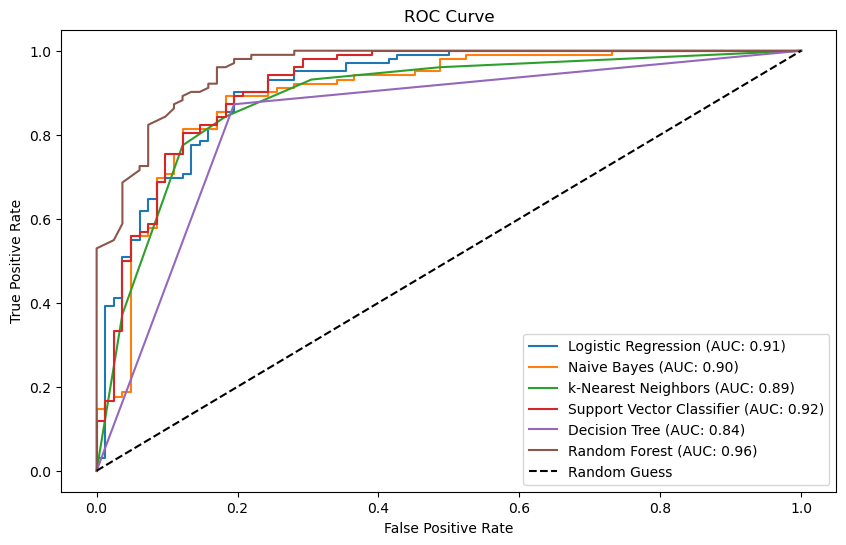

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)

import matplotlib.pyplot as plt

# 1. 데이터셋 불러오기
data_url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-14/heart_disease_uci.csv"
df = pd.read_csv(data_url)

# 2. 결측값 확인 및 처리
print("Missing values in dataset before processing:\n", df.isnull().sum())  # 결측값 확인

# 결측값 처리
for col in df.columns:
    if df[col].dtype == 'object':  # 범주형 데이터
        df[col].fillna(df[col].mode()[0], inplace=True)  # 최빈값으로 대체
    else:  # 수치형 데이터
        df[col].fillna(df[col].mean(), inplace=True)  # 평균값으로 대체

print("Missing values in dataset after processing:\n", df.isnull().sum())  # 결측값 확인

# 3. 타겟 변수 확인 및 이진 분류로 변환
if 'target' not in df.columns:
    df.rename(columns={"num": "target"}, inplace=True)  # 'num' 열을 'target'으로 변경
assert 'target' in df.columns, "The dataset does not contain a 'target' column."

if df['target'].nunique() > 2:
    print("Warning: Detected multiclass target. Converting to binary classification (0/1).")
    df['target'] = (df['target'] > 0).astype(int)  # 0: 심장병 없음, 1: 심장병 있음

# 독립 변수와 종속 변수 분리
X = df.drop(["target"], axis=1)  # 타겟 열 제거
y = df["target"]

# 범주형 열 확인 및 고유값 확인
print("\nUnique values in categorical columns before encoding:")
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"{col}: {X[col].unique()}")

# 4. 범주형 변수 처리
label_encoders = {}
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']  # 문자열 컬럼 자동 탐지
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # 범주형 변수를 수치형으로 변환
    label_encoders[col] = le

# 범주형 처리 후 확인
print("\nUnique values in categorical columns after encoding:")
for col in categorical_columns:
    print(f"{col}: {X[col].unique()}")

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. 데이터 스케일링 (k-NN, SVM에서 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 분류 알고리즘 초기화
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 결과 저장용
results = {}

# 8. 모델 학습 및 평가
for name, model in models.items():
    if name in ["k-Nearest Neighbors", "Support Vector Classifier"]:
        model.fit(X_train_scaled, y_train)  # 스케일링된 데이터 사용
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    # 평가
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Confusion Matrix에서 값 분리
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    error_rate = 1 - acc
    auc = roc_auc_score(y_test, y_prob)

    # Specificity (TNR) 및 Fall Out (FPR) 계산
    specificity = tn / (tn + fp)  # TNR = TN / (TN + FP)
    fall_out = fp / (fp + tn)     # FPR = FP / (FP + TN)

    # 결과 저장
    results[name] = {
        "Confusion Matrix": cm.tolist(),
        "Accuracy": acc,
        "Precision": prec,
        "Recall (TPR)": rec,
        "F1 Score": f1,
        "Error Rate": error_rate,
        "AUC": auc,
        "Specificity (TNR)": specificity,
        "Fall Out (FPR)": fall_out
    }

# 결과 출력
for name, metrics in results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

# 9. ROC Curve 시각화
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if name in ["k-Nearest Neighbors", "Support Vector Classifier"]:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
